In [11]:
import requests
import json
import pandas as pd
import datetime
import math
import seaborn as sns
import tweepy
import tkinter
import time
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# Pulling Data from Twitter


In [12]:


consumer_key = open("consumer key.txt","r").read()
consumer_secret = open("consumer secret key.txt","r").read()
access_token = open("access token.txt","r").read()
access_token_secret = open("access token secret.txt","r").read()
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [31]:



def searchTerm(query, max_tweets):
    conn = sqlite3.connect('twitterprofiles.db')
    c = conn.cursor()
    
    public_tweets = tweepy.Cursor(api.search, q=query).items(max_tweets)
    
    c.execute('CREATE TABLE IF NOT EXISTS '+query+' (dbtweetid int PRIMARY KEY, dbtweetdate text, dbtweettext text, polarity real)')
    
    for tweet in public_tweets:
        if (tweet.lang == "en") and (not tweet.retweeted) and ('RT @' not in tweet.text):
            tweetid = tweet.id
            tweetdate = tweet.created_at
            tweettext = tweet.text
            polarity = analyzer.polarity_scores(tweettext)['compound']
            c.execute("insert into "+query+" values (?,?,?,?)", (tweetid, tweetdate, tweettext, polarity))
            
    conn.commit()
    c.close()    


In [33]:
def clearTable(tableName):
    conn = sqlite3.connect('twitterprofiles.db')
    c = conn.cursor()
    c.execute(F"DELETE FROM {tableName}")
    conn.commit()
    c.close()
    
clearTable('Trump')

OperationalError: no such table: Trump

In [2]:
def dropTable(tableName):
    conn = sqlite3.connect('twitterprofiles.db')
    c = conn.cursor()
    c.execute(F"DROP TABLE IF EXISTS {tableName}")
    conn.commit()
    c.close()

In [27]:
dropTable('Trump')

In [17]:
searchTerm('Trump', 100)


In [29]:
conn = sqlite3.connect('twitterprofiles.db')
c = conn.cursor()
queryDF = pd.read_sql('Select * FROM Trump;', conn)
queryDF
c.close()
    

DatabaseError: Execution failed on sql 'Select * FROM Trump;': no such table: Trump

In [23]:
def visualizeQuery(query):
    conn = sqlite3.connect('twitterprofiles.db')
    queryDF = pd.read_sql(f"Select * FROM {query};", conn)
    queryDF.plot(x=queryDF['dbtweetid'],y=queryDF['polarity'],kind='scatter')

In [6]:
clearTable('Trump')

NameError: name 'clearTable' is not defined

In [28]:
queryDF

,dbtweetid,dbtweetdate,dbtweettext,polarity
0,1059154070353543170,2018-11-04 18:43:03,@VP unless you and your buddy Trump calls on R...,0.1280
1,1059154069707743232,2018-11-04 18:43:03,The movie... trump trump...\nhttps://t.co/0ATo...,0.0000
2,1059154069544226817,2018-11-04 18:43:02,@ItsTheJamieLynn @John_Ainslie @thehill Trump ...,-0.7369
3,1059154069334429697,2018-11-04 18:43:02,Since Trump and the GOP are salivating over bi...,0.0000
4,1059154068646486016,2018-11-04 18:43:02,@bumsfan @PeterWa33915152 @thedailybeast @Barr...,-0.8360
5,1059154067992195072,2018-11-04 18:43:02,@BeschlossDC @JohnJHarwood It was long ago &am...,0.4902
6,1059154067971174400,2018-11-04 18:43:02,@Amy_Siskind Don't worry about being inaccurat...,0.3412
7,1059154063680589825,2018-11-04 18:43:01,"Once again, Trump doubles down on hate https:/...",-0.5719
8,1059154063554539520,2018-11-04 18:43:01,How Trump Plans to Spin Losing the House - New...,-0.3818
9,1059154062392860674,2018-11-04 18:43:01,"@realDonaldTrump Go out and vote RED, or else ...",0.3182


In [19]:
querygroup = queryDF.groupby('dbtweetdate').mean()

NameError: name 'queryDF' is not defined

In [20]:
querygroup

NameError: name 'querygroup' is not defined

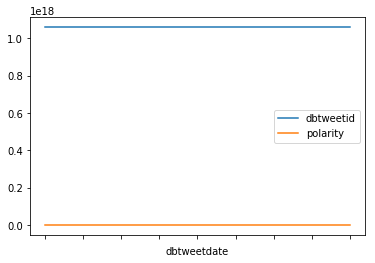

In [54]:
querygroup.plot()

In [21]:
def visualizeLocTrends(location):
    Trends =api.trends_place(location)
    Trendsdf = pd.DataFrame(Trends[0]['trends']).sort_values('tweet_volume', ascending=False).head(10)
    # Incomplete

In [22]:
def topicSentVisualization(topic):
    results =  api.search(topic,rpp=100, lang='en', show_user=True)
    df = pd.DataFrame(results)
    # Incomplete

# Sentiment Analysis

In [16]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()